In [1]:
! nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf

In [0]:
mnist = tf.keras.datasets.mnist

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [26]:
x_train.shape

(60000, 28, 28)

In [27]:
y_train.shape

(60000,)

In [28]:
x_test.shape

(10000, 28, 28)

In [29]:
y_test.shape

(10000,)

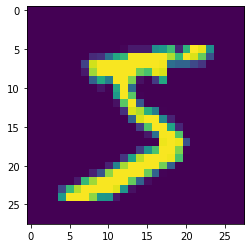

In [30]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])

In [31]:
y_train[0]

5

In [0]:
x_train, x_test = x_train / 255.0, x_test / 255.0

- Flatten: 打平, 把圖片從28 * 28 變成 784
- Dense: 隱藏層 256 個神經元, 激活函數: relu; dense = w*x + b
- Dropout: 隨機捨棄 20 % 的神經元

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# Dense: x * w + b
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dense(10))

In [46]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='sgd',
              loss=loss_fn,
              metrics=['accuracy'])
history = model.fit(x_train, y_train, 
          epochs=10,
          verbose = 1,
          validation_data = (x_test, y_test) )

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6095 - accuracy: 0.8422 - val_loss: 0.3060 - val_accuracy: 0.9142
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2861 - accuracy: 0.9183 - val_loss: 0.2505 - val_accuracy: 0.9291
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2338 - accuracy: 0.9327 - val_loss: 0.2088 - val_accuracy: 0.9379
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1993 - accuracy: 0.9433 - val_loss: 0.1834 - val_accuracy: 0.9480
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1731 - accuracy: 0.9509 - val_loss: 0.1662 - val_accuracy: 0.9502
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1528 - accuracy: 0.9565 - val_loss: 0.1449 - val_accuracy: 0.9576
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1368 - accuracy: 0.9610 - val_loss: 0.1342 - val_accuracy:

In [0]:
predictions = model(x_test).numpy()

In [37]:
predictions.shape

(10000, 10)

In [0]:
import numpy as np
y_pred = np.argmax(predictions, axis = 1)

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, y_pred)

0.9783

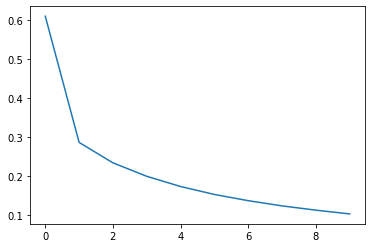

In [47]:

from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('loss'))), history.history.get('loss'))

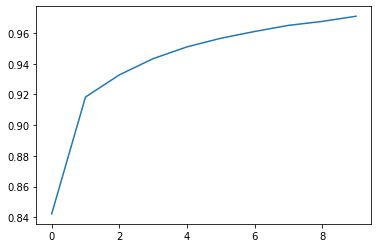

In [48]:

from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('accuracy'))), history.history.get('accuracy'))

## 小任務
- 請使用 tf.keras 搭建一個深度學習模型，預測iris 的類別